In [1]:
dataset_url = 'https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset' 

In [2]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vishal1516841865651
Your Kaggle Key: ········


100%|██████████| 4.11k/4.11k [00:00<00:00, 1.05MB/s]

In [3]:
# Change this
data_dir = './heart-attack-analysis-prediction-dataset'

In [4]:
import os
os.listdir(data_dir)

['heart.csv', 'o2Saturation.csv']

## Data Preparation 




In [5]:
!pip install  xgboost
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

 # EDA + Prediction on Heart Attack Dataset (87.9% Accuracy)

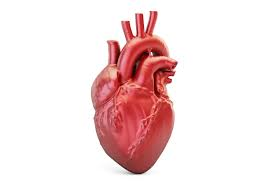

# About The Dataset
- Age : Age of the patient
- Sex : Sex of the patient (1 = male, 0 = female)
- exang: exercise induced angina (1 = yes; 0 = no)
- caa: number of major vessels (0-3)
- cp : Chest Pain type
        Value 0: typical angina
        Value 1: atypical angina
        Value 2: non-anginal pain
        Value 3: asymptomatic
- trtbps : resting blood pressure (in mm Hg)
- chol : cholestoral in mg/dl fetched via BMI sensor
- slp: the slope of the peak exercise ST segment
- — Value 0: upsloping
- — Value 1: flat
- — Value 2: downsloping
- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- oldpeak: ST depression induced by exercise relative to rest
- rest_ecg : resting electrocardiographic results
        Value 0: normal
        Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach : maximum heart rate achieved
- target : 0 = less chance of heart attack, 1 = more chance of heart attack**

In [6]:
df = pd.read_csv(data_dir + "/heart.csv")

In [7]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.shape

(303, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


# Data Cleaning

Checking for the missing values

In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [12]:
df.duplicated().sum()

1

Handling the duplicates

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

## Exploratory Analysis and Visualization




Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [15]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# ***Number of heart aattack based on sex***

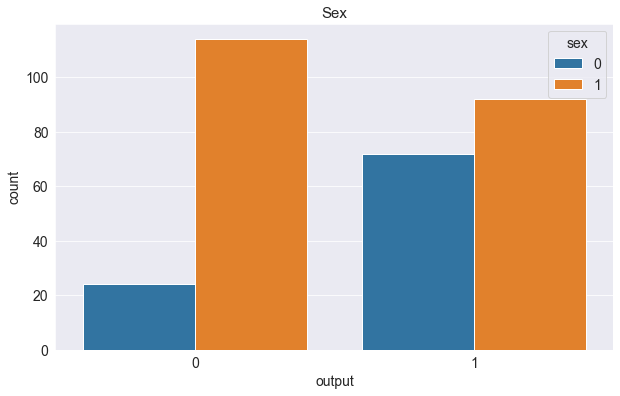

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(df["output"], hue = df["sex"])
plt.title("Sex", size=15)
plt.show()

# ***Distribution plot of resting blood pressure***

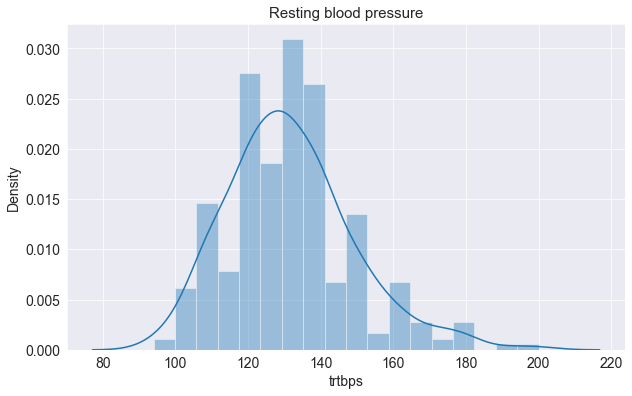

In [17]:
plt.figure(figsize=(10,6))
sns.distplot(df["trtbps"])
plt.title("Resting blood pressure", size=15)
plt.show()

# ***Distribution plot of Cholestrol***

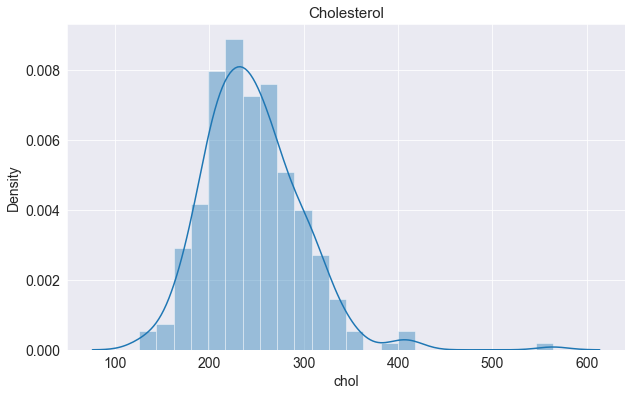

In [18]:
plt.figure(figsize=(10,6))
sns.distplot(df["chol"])
plt.title("Cholesterol", size=15)
plt.show()

# ***Type of Chest pain***

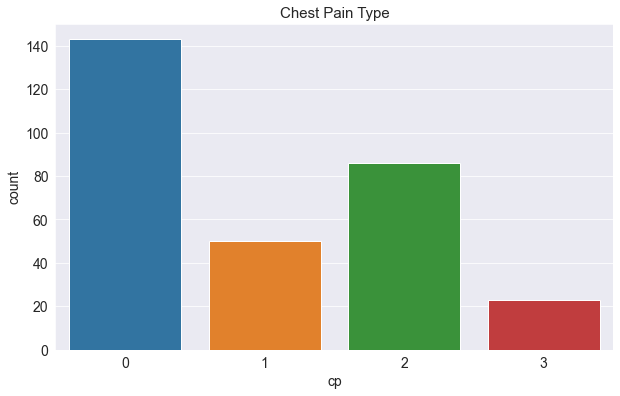

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(df["cp"])
plt.title("Chest Pain Type", size=15)
plt.show()

# ***Chances of heart attack based on resting electrocardiographic***

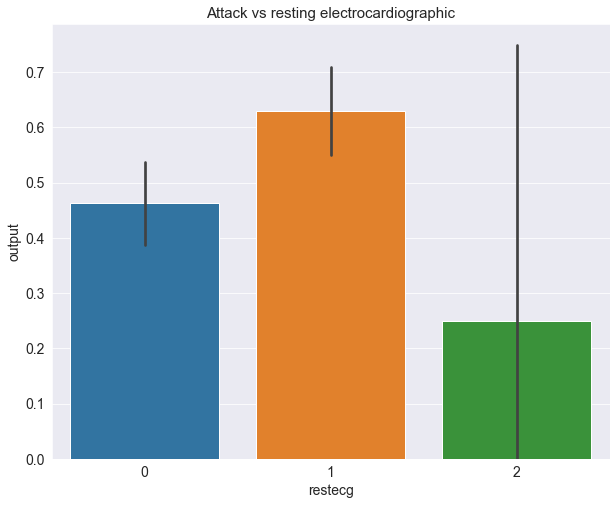

In [20]:
plt.figure(figsize=(10,8))
sns.barplot(x=df["restecg"], y=df["output"])
plt.title("Attack vs resting electrocardiographic", size=15)
plt.show()

# Scatter plot of Old peak value and age with respect to sex

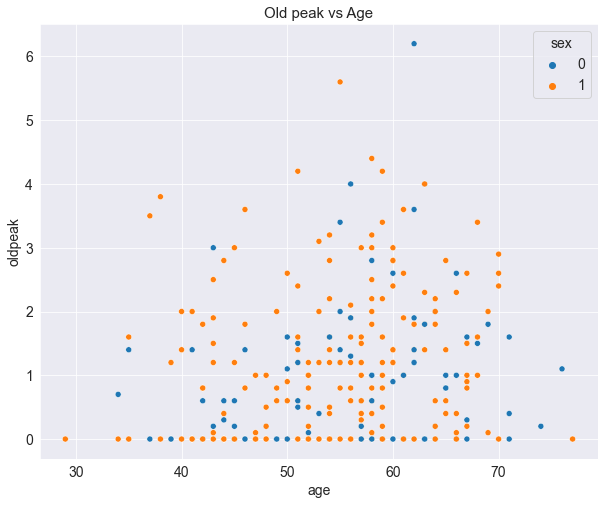

In [21]:
plt.figure(figsize=(10,8))
sns.scatterplot(y = df["oldpeak"],x = df["age"], hue = df["sex"])
plt.title("Old peak vs Age", size=15)
plt.show()

**We have plotted a scatter plot between Old peak value and age with respect to sex, old peak value is the ST depression induced by exercise relative to rest. It is classified as follows:
    
    1. If value is less than 2 then low risk of heart attack.
    2. If value is in the range 1.5 to 4.2 then high risk of heart attack.
    3. If the value is greater than 2.55 the condition is terrible.**
    
** From the graph we can conclude that men have more chance of heart attack as compared to women as we can see that more orange dots when value of old peak is greater than 2.55**

# Line plot of age and maximum heart rate achieved with respect to sex

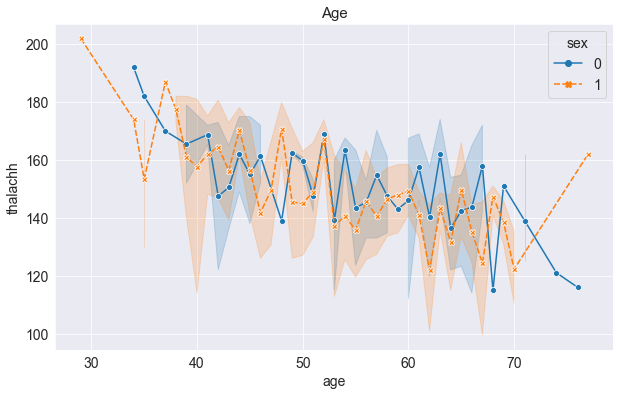

In [22]:
plt.figure(figsize=(10,6))
sns.lineplot(x = df["age"],y = df["thalachh"], hue = df["sex"],style = df["sex"], markers = True)
plt.title("Age", size=15)
plt.show()

**We plotted a line plot between Age and Maximum heart rate achieved with respect to sex, we can conclude that men are experiencing higher heart rate as compared to women due to which men have higher chances of heart attack.**

# Distribution plot of chance of heart attack with respect to cholestrol level  

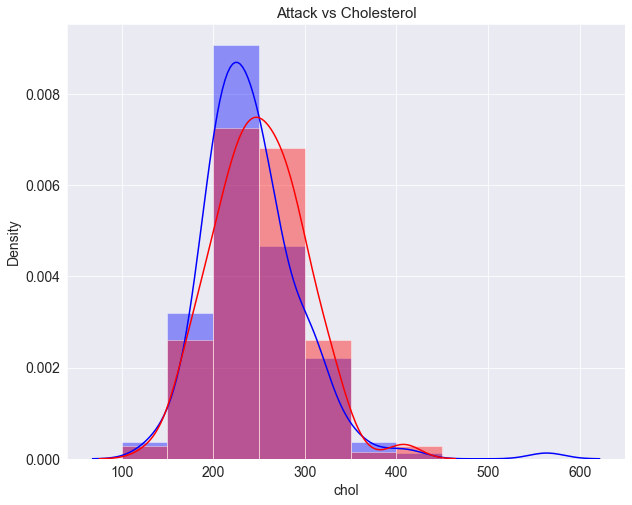

In [23]:
plt.figure(figsize=(10,8))
sns.distplot(df[df["output"]==1]["chol"], color="blue", bins=np.arange(100,600,50))
sns.distplot(df[df["output"]==0]["chol"], color="red",bins=np.arange(100,600,50))
plt.title("Attack vs Cholesterol", size=15)
plt.show()

**We plotted a distribution plot of chance of heart attack with respect cholestrol and we found that people having cholestrol level between 200 to 250 are experiencing more heart attack. Blue colour in the graph represents the male and red colour represents the female and we can see in the graph males are experiencing more heart attack as compared to females.**

# Distribution plot of chance of heart attack with respect to resting blood pressure  

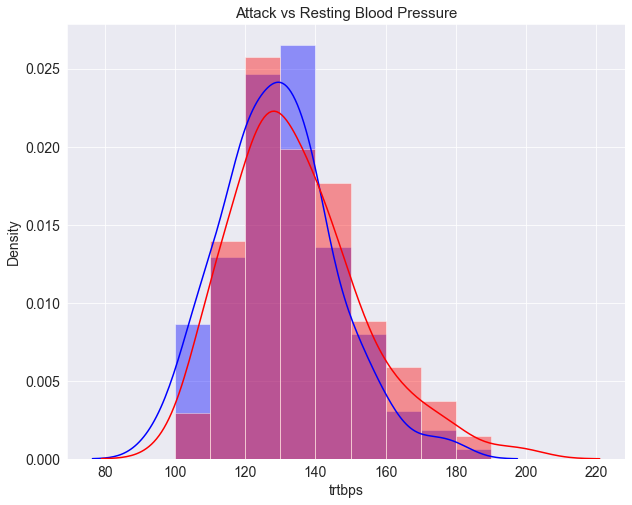

In [24]:
plt.figure(figsize=(10,8))
sns.distplot(df[df["output"]==1]["trtbps"], color="blue", bins=np.arange(100,200,10))
sns.distplot(df[df["output"]==0]["trtbps"], color="red",bins=np.arange(100,200,10))
plt.title("Attack vs Resting Blood Pressure", size=15)
plt.show()

**We plotted a distribution plot of chance of heart attack with respect Resting Blood Pressure and we found that people having Resting Blood Pressure level between 120 to 140 are experiencing more heart attack. Blue colour in the graph represents the male and red colour represents the female and we can see in the graph males are experiencing more heart attack at resting blood pressure between 130 to 140 and in females the range is in between 120 to 130 and also we can see that males are experincing more heart attack.**

# Correlation between variables

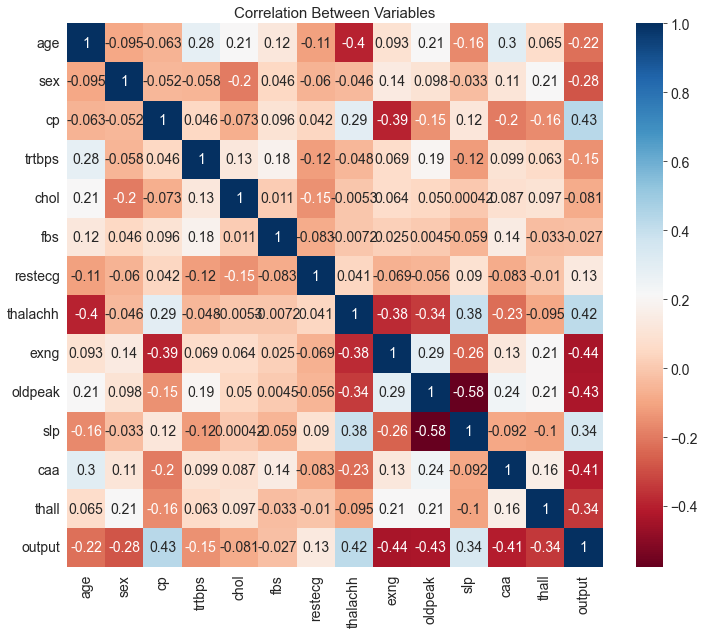

In [25]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True, cmap="RdBu")
plt.title("Correlation Between Variables", size=15)
plt.show()

**This heatmap shows between correlation between all columns in our dataset, stronger the colour higher the correlation magnitude.**

## Inferences and Conclusion

**From the above graphs we can conclude that men have more chances of heart attack as compared to women.**

## References and Future Work

**References** - https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset 

**Future Work** - For future work we can use machine learning to predict the chances of heart attack in a person using the factors age, cholesterol level and resting blood pressure. 